In [1]:
import sys
sys.path.append("../src") # Adds higher directory to python modules path.

from early_text_classifier import EarlyTextClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
etc_kwargs = {'dataset_path': '../dataset/cachopo',
              'dataset_name': 'r8-all-terms-clean',
              'initial_step': 1,
              'step_size': 1}
preprocess_kwargs = {'min_word_length': 2,
                     'max_number_words': 10000}
cpi_clf = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=False)
cpi_kwargs = {'train_dataset_percentage': 0.75,
              'test_dataset_percentage': 0.25,
              'doc_rep': 'term_frec',
              'cpi_clf': cpi_clf}
context_kwargs = {'number_most_common': 25}
dmc_clf = LogisticRegression(C=2, solver='liblinear', n_jobs=1, random_state=0)
dmc_kwargs = {'train_dataset_percentage': 0.75,
              'test_dataset_percentage': 0.25,
              'dmc_clf': dmc_clf}

etc = EarlyTextClassifier(etc_kwargs, preprocess_kwargs, cpi_kwargs,
                          context_kwargs, dmc_kwargs)

In [3]:
etc.print_params_information()

Dataset name: r8-all-terms-clean
Dataset path: ../dataset/cachopo
--------------------------------------------------------------------------------
Pre-process params:
{'max_number_words': 10000, 'min_word_length': 2}
--------------------------------------------------------------------------------
CPI params:
{'cpi_clf': BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=False),
 'doc_rep': 'term_frec',
 'initial_step': 1,
 'step_size': 1,
 'test_dataset_percentage': 0.25,
 'train_dataset_percentage': 0.75}
--------------------------------------------------------------------------------
Context Information params:
{'initial_step': 1, 'number_most_common': 25, 'step_size': 1}
--------------------------------------------------------------------------------
DMC params:
{'dmc_clf': LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='l

In [4]:
Xtrain, ytrain, Xtest, ytest = etc.preprocess_dataset()
etc.fit(Xtrain, ytrain)

Pre-processing dataset
Building dictionary
555039  total words  19956  unique words
Considering only 10000 unique terms
Xtrain.shape: (5485, 965)
ytrain.shape: (5485,)
Xtest.shape: (2189, 842)
ytest.shape: (2189,)
Training EarlyTextClassifier model
Obtaining information from the preprocessed training data
Splitting preprocessed dataset for the PartialInformationClassifier
cpi_Xtrain.shape: (4113, 965)
cpi_ytrain.shape: (4113,)
cpi_Xtest.shape: (1372, 965)
cpi_ytest.shape: (1372,)
Training PartialInformationClassifier
cpi_Xtrain_representation.shape: (4113, 10001)
Predicting with PartialInformationClassifier
cpi_partial[i]_Xtest_representation.shape: (1372, 10001)
Generating DecisionClassifier dataset
Splitting preprocessed dataset for the DecisionClassifier
dmc_Xtrain.shape: (100, 1029, 24)
dmc_ytrain.shape: (100, 1029)
dmc_Xtest.shape: (100, 343, 24)
dmc_ytest.shape: (100, 343)
Training PartialInformationClassifier
Predicting with DecisionClassifier


In [5]:
cpi_perc, cpi_pred, dmc_pred, pred_time, dmc_ytest = etc.predict(Xtest, ytest)

Predicting with the EarlyTextClassifier model
Predicting with PartialInformationClassifier
cpi_partial[i]_Xtest_representation.shape: (2189, 10001)
Generating DecisionClassifier dataset
Predicting with DecisionClassifier


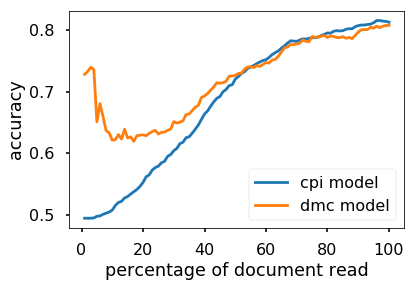

In [6]:
num_steps = len(cpi_perc)
x = cpi_perc
accuracy_cpi = np.sum(cpi_pred == ytest, axis=1) / ytest.size
y_cpi = np.zeros(num_steps)
y_dmc = np.zeros(num_steps)
for idx in range(num_steps):
    y_cpi[idx] = np.sum(cpi_pred[idx] == ytest) / ytest.size
    y_dmc[idx] = np.sum(dmc_pred[idx] == dmc_ytest[idx]) / dmc_ytest[idx].size

plt.plot(x, y_cpi, label='cpi model')
plt.plot(x, y_dmc, label='dmc model')
plt.xlabel('percentage of document read')
plt.ylabel('accuracy')
plt.legend();

In [7]:
penalization_type = 'Losada-Crestani'
time_threshold = 30
costs = {'c_tp': 1.0,
         'c_fn': 1.0,
         'c_fp': 1.0}

etc.score(ytest, cpi_pred, cpi_perc, pred_time, penalization_type,
          time_threshold, costs);

                    Score ETC                     
--------------------------------------------------
 Precision average=macro: 0.56
    Recall average=macro: 0.193
F1 Measure average=macro: 0.203
                Accuracy: 0.535
               EDE o=30 : 0.586
--------------------------------------------------
             precision    recall  f1-score   support

        acq       0.66      0.06      0.12       696
      crude       0.95      0.15      0.26       121
       earn       0.52      1.00      0.69      1083
      grain       0.00      0.00      0.00        10
   interest       1.00      0.05      0.09        81
   money-fx       0.65      0.13      0.21        87
       ship       0.00      0.00      0.00        36
      trade       0.71      0.16      0.26        75

avg / total       0.61      0.54      0.41      2189

--------------------------------------------------
Confusion matrix:
array([[  44,    1,  649,    0,    0,    0,    0,    2],
       [   5,   18,   98,    

In [8]:
etc.save_model()

Saving model
